In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import tensorflow as tf
# Helper Library
import numpy as np
import matplotlib.pyplot as plt

### Import the Fashion Mnist datset Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### Class name

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Explore the data

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)


60000

In [19]:
test_images.shape

(10000, 28, 28)

### Preprocess the data

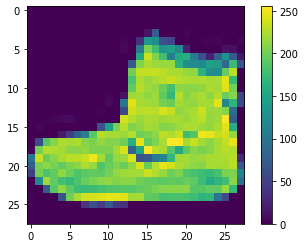

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Scale the images to a range of 0 to 1 before feading them onto neural network model

In [25]:
train_images = train_images/255
test_images  = test_images/255

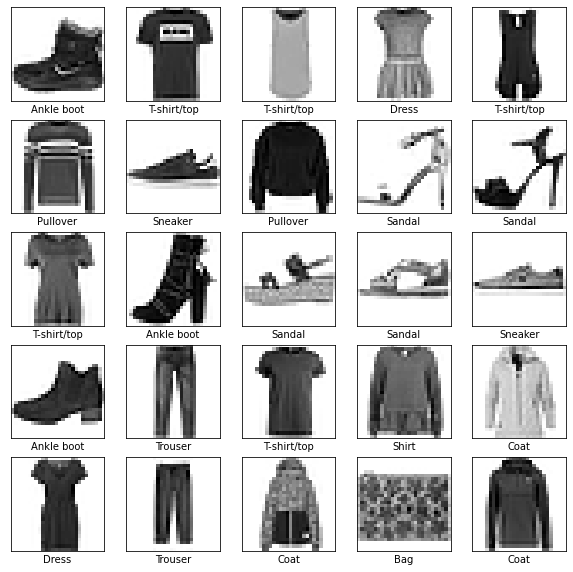

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

### Set Up the layers

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-03-16 05:29:07.077334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-16 05:29:07.077370: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-16 05:29:07.077393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-03-16 05:29:07.077645: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model
- Loss Function 
- Optimizer
- Metrics

In [67]:
model.compile(optimizer='adamax',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Train the model

In [68]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.9983
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 0.9986
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 0.9988
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0051 - accuracy: 0.9989
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 0.9989
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.004

### Evaluate Accuracy

In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.1971 - accuracy: 0.8859 - 467ms/epoch - 1ms/step

Test accuracy: 0.8859000205993652


### Make preds and verify

In [48]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [49]:
predictions = probability_model.predict(test_images)


In [52]:
predictions[0]

array([0.0000000e+00, 8.4112150e-38, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.9003594e-17, 3.0568169e-38, 1.9650862e-17,
       0.0000000e+00, 1.0000000e+00], dtype=float32)

In [53]:
np.argmax(predictions[0])

9

In [62]:
def plot_image(i,preds_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    color='red'
    predicted_label = np.argmax(preds_array)
    if predicted_label == true_label:
        color == 'blue'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(preds_array),class_names[true_label]),color=color)

In [64]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

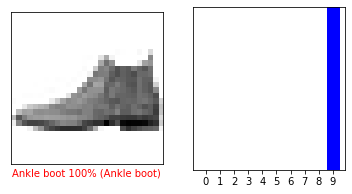

In [65]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


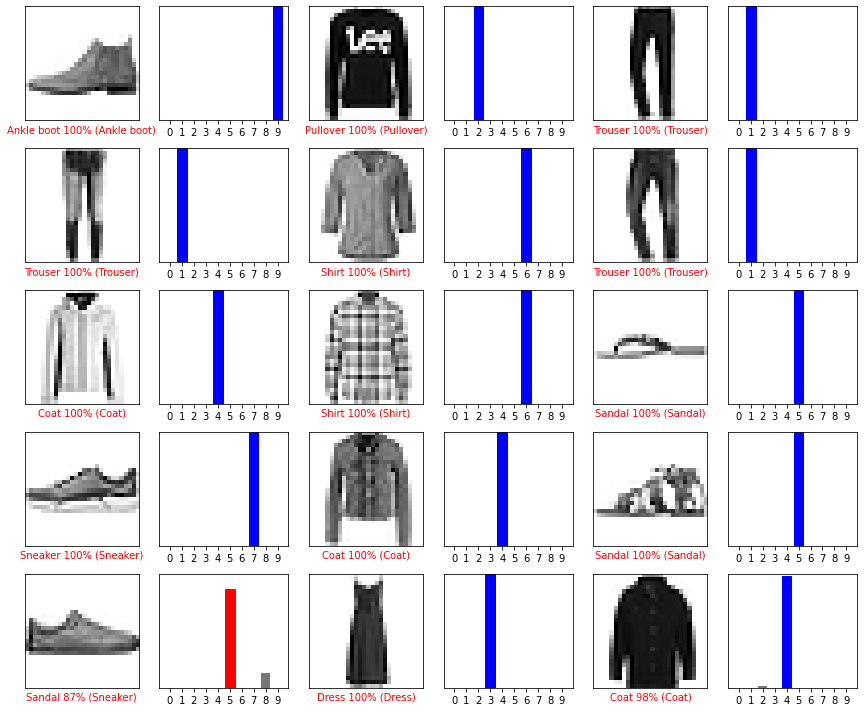

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()